# Dataset analysis 

In [180]:
import numpy as np
import math
import pandas as pd
import os.path
import matplotlib.pyplot as plt
from typing import List, Dict
import seaborn as sns
import json
from matplotlib import cm
from pprint import pformat
import json
import tikzplotlib


plt.style.use("seaborn")
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [181]:
def load_json(filename : str) -> Dict:
    with open(filename, 'r') as f:
        data = json.load(f)
    return data

In [182]:
base_path_raw = r'/media/jan/DataStorage/ProjectData/temp/results_weighted_dataset_X_contrast_3'
base_path = [os.path.abspath(base_path_raw.replace('X', str(i))) for i in range(3)]

In [183]:
def get_results_frame(dim : int, csv_name = 'parameter_overview') -> pd.DataFrame:
    model_folders = [os.path.join(base_path[dim], o) for o in os.listdir(base_path[dim]) if os.path.isdir(os.path.join(base_path[dim],o)) and not o.startswith('.')]
    results = list()
    for folder in model_folders:
        try:
            r = load_json(os.path.join(folder, r'score_dict_final.json'))
        except:
            print(f'No experimant dict for folder {folder}.')
            continue
        exp_dict = load_json(os.path.join(folder, f'exp_dict.json'))
        r.update({
            'model_base' : exp_dict['model']['base'],
            'context_span' : exp_dict['dataset']['context_span'],
            'blob_points' : exp_dict['dataset']['blob_points'],
            'bg_points' : exp_dict['dataset']['bg_points'],
            'loss' : exp_dict['model']['loss'],
            'foldername' : folder.split('/')[-1],
            'sources' : exp_dict['dataset']['sources'],
            'separation_loss' : ('separation_loss' in exp_dict['model']['loss']),
            'prior_extend' : ('prior_extend' in exp_dict['model']['loss']),
            'weighted_point_loss' : ('rot_point_loss_multi_weighted' in exp_dict['model']['loss'])
        })
        results.append(r)

    results = pd.DataFrame(results).sort_values(['test_weighted_dice', 'test_dice'], ascending = False).reset_index(drop=True)
    results.to_csv(f'{csv_name}_dim{dim}')
    return results

In [184]:
results_dict = {dim : get_results_frame(dim) for dim in range(3)}
results_dict[0][['context_span', 'blob_points', 'bg_points', 'loss', 'separation_loss', 'weighted_point_loss', 'prior_extend', 'sources', 'test_weighted_dice', 'foldername']]

No experimant dict for folder /media/jan/DataStorage/ProjectData/temp/results_weighted_dataset_1_contrast_3/f877f00e3685efddf33a64d51d311dcb.
No experimant dict for folder /media/jan/DataStorage/ProjectData/temp/results_weighted_dataset_2_contrast_3/a38029e4d3d6d3c46092aa963ef04570.


,context_span,blob_points,bg_points,loss,separation_loss,weighted_point_loss,prior_extend,sources,test_weighted_dice,foldername
0,1,1,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.625821,e5df8bf39051f574de84779e9b30c029_xVertSeg
1,1,1,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.565390,e5df8bf39051f574de84779e9b30c029_PLoS
2,1,1,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.559706,e5df8bf39051f574de84779e9b30c029_USiegen
3,1,3,10,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.495984,28226d50e9b646704dd7b51c35de21d3
4,1,1,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.475737,e5df8bf39051f574de84779e9b30c029
5,1,5,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.470770,6126782960c8ebeb44c781ecade37ba1
6,1,3,10,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,True,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.442121,77f85a6af05d76de63618ecb027b4210
7,1,1,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.427556,e5df8bf39051f574de84779e9b30c029_MyoSegmenTUM
8,1,5,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",False,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.359360,b498b1c4bb2a67d50083b0e0fafab75d
9,1,5,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,False,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.317056,cbce367c887651d9c7baa1cf17defa60


In [185]:
results_dict[1][['context_span', 'blob_points', 'bg_points', 'loss', 'separation_loss', 'weighted_point_loss', 'prior_extend', 'sources', 'test_weighted_dice', 'foldername']]

,context_span,blob_points,bg_points,loss,separation_loss,weighted_point_loss,prior_extend,sources,test_weighted_dice,foldername
0,1,1,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.357091,6ef4aab564b17ec9748cd7e25f651d09_xVertSeg
1,1,1,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.342328,6ef4aab564b17ec9748cd7e25f651d09_MyoSegmenTUM
2,1,1,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.339489,6ef4aab564b17ec9748cd7e25f651d09
3,1,5,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.328977,7b8b7a23f8c8708146931117bac6ffda
4,5,5,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.295990,b8c6a17ee1dde24e0b4660954b64246a
5,1,7,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.289645,e924058886c7bf857f858db911a74908
6,1,5,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.288723,ace0b040af2185b7a0f5597fb628fc22
7,1,1,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.285559,6ef4aab564b17ec9748cd7e25f651d09_USiegen
8,1,7,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.277018,2c47333b1ea4c305ed0a3e23f12ee32f
9,1,5,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,True,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.123746,84dac37fa575a29e150a8a3aa16f3a90


In [186]:
results_dict[2][['context_span', 'blob_points', 'bg_points', 'loss', 'separation_loss', 'weighted_point_loss', 'prior_extend', 'sources', 'test_weighted_dice', 'foldername']]

,context_span,blob_points,bg_points,loss,separation_loss,weighted_point_loss,prior_extend,sources,test_weighted_dice,foldername
0,1,1,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.427247,6ef4aab564b17ec9748cd7e25f651d09_USiegen
1,1,1,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.353907,6ef4aab564b17ec9748cd7e25f651d09_MyoSegmenTUM
2,1,1,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.350211,6ef4aab564b17ec9748cd7e25f651d09
3,1,5,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.332808,7b8b7a23f8c8708146931117bac6ffda
4,1,7,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.332644,2c47333b1ea4c305ed0a3e23f12ee32f
5,5,5,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.329521,b8c6a17ee1dde24e0b4660954b64246a
6,1,5,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",False,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.325296,48ac69c67433af876745c307e2791c37
7,1,5,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.312020,ace0b040af2185b7a0f5597fb628fc22
8,1,7,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.305078,e924058886c7bf857f858db911a74908
9,1,1,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM]",0.282290,6ef4aab564b17ec9748cd7e25f651d09_xVertSeg


investigate influence of leaving out a loss term

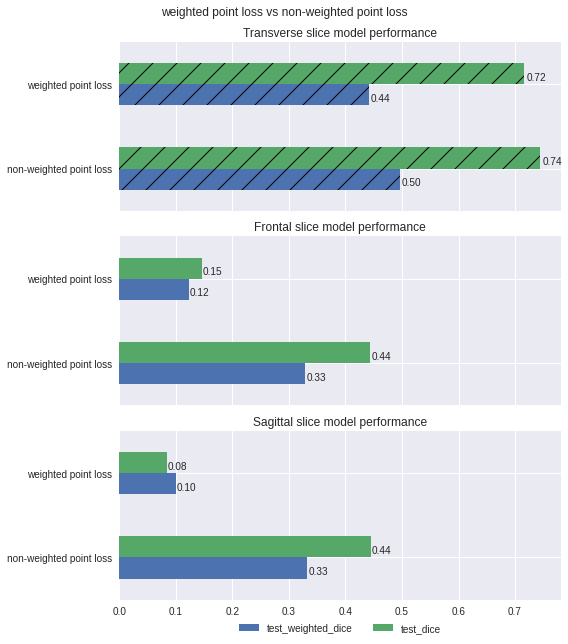

In [187]:
plt.figure(figsize=(8,9))
ax = plt.subplot(3,1,1)
res_select = results_dict[0].query('context_span == 1 & blob_points == 3 & bg_points == 10')
bars = res_select.plot.barh(x = 'weighted_point_loss', y = ['test_weighted_dice', 'test_dice'], ax=plt.gca(), legend=False, hatch = '/')
for p in bars.patches:
    ax.annotate(f'{p.get_width():0.2f}', ( p.get_width() * 1.005, p.get_y() + 0.05))
plt.title('Transverse slice model performance')
plt.yticks(ticks = [True, False], labels = ['weighted point loss', 'non-weighted point loss'])
plt.ylabel('')


plt.subplot(3,1,2, sharex = ax)
res_select = results_dict[1].query('context_span == 1 & blob_points == 5 & bg_points == 5')
bars = res_select.plot.barh(x = 'weighted_point_loss', y = ['test_weighted_dice', 'test_dice'], ax=plt.gca(), legend=False)
for p in bars.patches:
    plt.annotate(f'{p.get_width():0.2f}', ( p.get_width() * 1.005, p.get_y() + 0.05))
plt.title('Frontal slice model performance')
plt.yticks(ticks = [True, False], labels = ['weighted point loss', 'non-weighted point loss'])
plt.ylabel('')

plt.subplot(3,1,3, sharex = ax)
res_select = results_dict[2].query('context_span == 1 & blob_points == 5 & bg_points == 5 & separation_loss')
bars = res_select.plot.barh(x = 'weighted_point_loss', y = ['test_weighted_dice', 'test_dice'], ax=plt.gca())
for p in bars.patches:
    plt.annotate(f'{p.get_width():0.2f}', ( p.get_width() * 1.005, p.get_y() + 0.05))
plt.title('Sagittal slice model performance')
plt.yticks(ticks = [True, False], labels = ['weighted point loss', 'non-weighted point loss'])
plt.ylabel('')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25),
          ncol=2)

plt.suptitle('weighted point loss vs non-weighted point loss')
plt.tight_layout()

plt.savefig('weightedvsnonweighted.png')

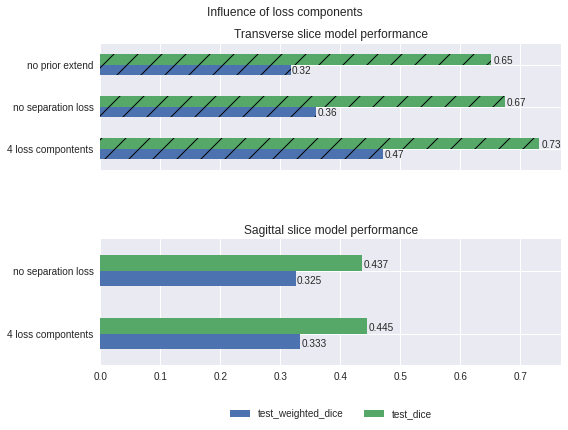

In [188]:
plt.figure(figsize=(8,8))
ax = plt.subplot(3,1,1)
res_select = results_dict[0].query('context_span == 1 & blob_points == 5 & bg_points == 5')
bars = res_select.plot.barh(x = 'loss', y = ['test_weighted_dice', 'test_dice'], ax=plt.gca(), legend=False, hatch = '/')
for p in bars.patches:
    ax.annotate(f'{p.get_width():0.2f}', ( p.get_width() * 1.005, p.get_y() + 0.03))
plt.title('Transverse slice model performance')
plt.yticks(ticks = [2, 1, 0], labels = ['no prior extend', 'no separation loss', '4 loss compontents'])
plt.ylabel('')

plt.subplot(3,1,2, sharex = ax)
res_select = results_dict[2].query('context_span == 1 & blob_points == 5 & bg_points == 5 & not weighted_point_loss')
bars = res_select.plot.barh(x = 'loss', y = ['test_weighted_dice', 'test_dice'], ax=plt.gca())
for p in bars.patches:
    plt.annotate(f'{p.get_width():0.3f}', ( p.get_width() * 1.005, p.get_y() + 0.05))
plt.title('Sagittal slice model performance')
plt.yticks(ticks = [1, 0], labels = ['no separation loss', '4 loss compontents'])
plt.ylabel('')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.50),
          ncol=2)

plt.suptitle('Influence of loss components')
plt.tight_layout()

plt.savefig('Losscomponents.png')
tikzplotlib.save('Losscomponents.tex', axis_width ='8cm', axis_height ='8cm')

In [189]:
res_select = results_dict[1].query('context_span == 1 & weighted_point_loss == False & separation_loss')
res_select = res_select[-res_select.foldername.str.contains('_')]
res_1 = res_select.pivot(index = 'blob_points', columns = 'bg_points', values = 'test_weighted_dice')
res_select = results_dict[2].query('context_span == 1 & weighted_point_loss == False & separation_loss')

res_select = res_select[-res_select.foldername.str.contains('_')]

res_2 = res_select.pivot(index = 'blob_points', columns = 'bg_points', values = 'test_weighted_dice')

res_select

,train_score,train_weighted_dice,train_dice,train_loss,epoch,waiting,val_score,val_weighted_dice,val_dice,test_dice,...,model_base,context_span,blob_points,bg_points,loss,foldername,sources,separation_loss,prior_extend,weighted_point_loss
2,0.409622,0.409622,0.495781,-8.425481,1,4,0.377342,0.377342,0.470773,0.458656,...,fcn8_vgg16,1,1,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",6ef4aab564b17ec9748cd7e25f651d09,"[xVertSeg, USiegen, MyoSegmenTUM]",True,True,False
3,0.389227,0.389227,0.481686,-8.409649,2,4,0.360313,0.360313,0.458403,0.444835,...,fcn8_vgg16,1,5,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",7b8b7a23f8c8708146931117bac6ffda,"[xVertSeg, USiegen, MyoSegmenTUM]",True,True,False
4,0.378288,0.378288,0.473831,-8.436708,12,4,0.352975,0.352975,0.453290,0.443631,...,fcn8_vgg16,1,7,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",2c47333b1ea4c305ed0a3e23f12ee32f,"[xVertSeg, USiegen, MyoSegmenTUM]",True,True,False
7,0.369492,0.369492,0.413946,-8.288434,18,4,0.332472,0.332472,0.389681,0.426807,...,fcn8_vgg16,1,5,3,"[unsupervised_rotation_loss, rot_point_loss_mu...",ace0b040af2185b7a0f5597fb628fc22,"[xVertSeg, USiegen, MyoSegmenTUM]",True,True,False
8,0.358730,0.358730,0.446945,-8.297664,18,4,0.325814,0.325814,0.422322,0.419827,...,fcn8_vgg16,1,7,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",e924058886c7bf857f858db911a74908,"[xVertSeg, USiegen, MyoSegmenTUM]",True,True,False


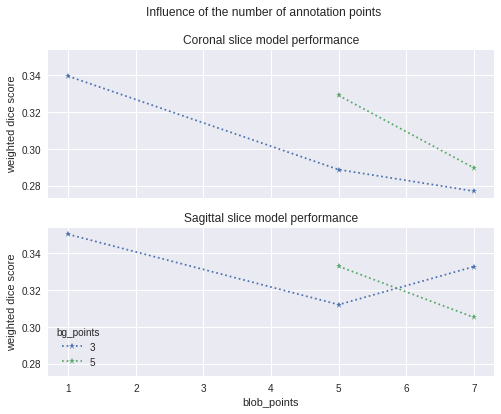

In [190]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
ax = res_1.plot(ax = plt.gca(), legend=False, linestyle = ':', marker = '*')
plt.xlabel('weighted dice score')
plt.title('Coronal slice model performance')
ax.set_ylabel("weighted dice score")
plt.subplot(2,1,2, sharex = ax, sharey = ax)
ax = res_2.plot(ax = plt.gca(), linestyle = ':', marker = '*')
plt.title('Sagittal slice model performance')
ax.set_ylabel("weighted dice score")

plt.suptitle('Influence of the number of annotation points')

plt.savefig('BlobPoints_influence.png')
tikzplotlib.save('BlobPoints_influence.tex', axis_width ='8cm', axis_height ='6cm')

In [191]:
reconstruct_foldernames = []

res_select = results_dict[0].query('context_span == 1 & weighted_point_loss == False & separation_loss & blob_points == 1')
res_select = res_select[-res_select.foldername.str.contains('_')]
print(res_select[['foldername', 'test_weighted_dice']])
reconstruct_foldernames.append(res_select.foldername.iloc[0])
res_select = results_dict[1].query('context_span == 1 & weighted_point_loss == False & separation_loss & bg_points == 3 & blob_points == 1')
res_select = res_select[-res_select.foldername.str.contains('_')]
print(res_select[['foldername', 'test_weighted_dice']])
reconstruct_foldernames.append(res_select.foldername.iloc[0])
res_select = results_dict[2].query('context_span == 1 & weighted_point_loss == False & separation_loss & bg_points == 3 & blob_points == 1')
res_select = res_select[-res_select.foldername.str.contains('_')]
print(res_select[['foldername', 'test_weighted_dice']])
reconstruct_foldernames.append(res_select.foldername.iloc[0])


exp_dict_reconstruct = dict()
for i, foldername in enumerate(reconstruct_foldernames):
    folder = os.path.join(base_path[i], foldername)
    print(folder)
    exp_dict = load_json(os.path.join(folder, f'exp_dict.json'))
    exp_dict['hash'] = foldername
    exp_dict_reconstruct[i] = exp_dict

with open('exp_dict_reconstruct.json', 'w') as f:
    json.dump(exp_dict_reconstruct, f)
    

                         foldername  test_weighted_dice
4  e5df8bf39051f574de84779e9b30c029            0.475737
                         foldername  test_weighted_dice
2  6ef4aab564b17ec9748cd7e25f651d09            0.339489
                         foldername  test_weighted_dice
2  6ef4aab564b17ec9748cd7e25f651d09            0.350211
/media/jan/DataStorage/ProjectData/temp/results_weighted_dataset_0_contrast_3/e5df8bf39051f574de84779e9b30c029
/media/jan/DataStorage/ProjectData/temp/results_weighted_dataset_1_contrast_3/6ef4aab564b17ec9748cd7e25f651d09
/media/jan/DataStorage/ProjectData/temp/results_weighted_dataset_2_contrast_3/6ef4aab564b17ec9748cd7e25f651d09


In [192]:
res_select.foldername.iloc[0]

'6ef4aab564b17ec9748cd7e25f651d09'

6ef4aab564b17ec9748cd7e25f651d09


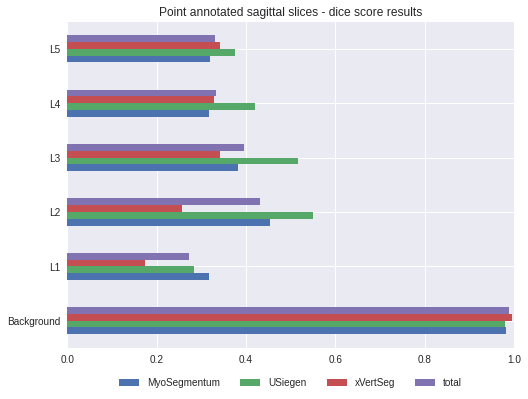

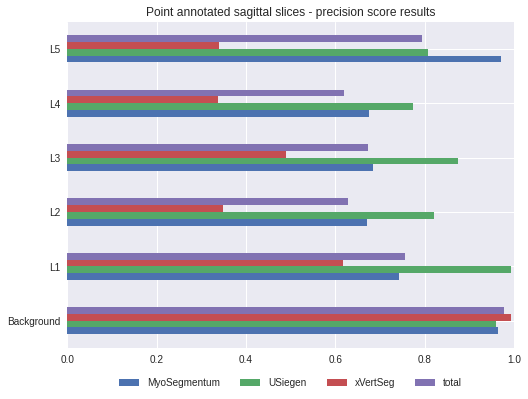

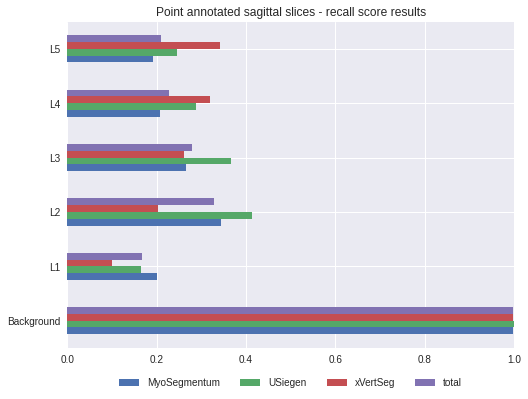

In [193]:
foldername = res_select.foldername.iloc[0]
print(foldername)
Myo_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_MyoSegmenTUM_df.csv'), index_col=0)
USieg_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_USiegen_df.csv'), index_col=0)
xVert_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_xVertSeg_df.csv'), index_col=0)
all_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_df.csv'), index_col=0)

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['dice']

temp.plot(kind = 'barh', xlim = (0, 1), figsize=(8, 6))
plt.title('Point annotated sagittal slices - dice score results')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=4)
plt.savefig('full_perClass_perSource_point_dice.png')

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['precision']

temp.plot(kind = 'barh', xlim = (0, 1), figsize=(8, 6))
plt.title('Point annotated sagittal slices - precision score results')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=4)
plt.savefig('full_perClass_perSource_point_precision.png')

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['recall']

temp.plot(kind = 'barh', xlim = (0, 1), figsize=(8, 6))
plt.title('Point annotated sagittal slices - recall score results')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=4)
plt.savefig('full_perClass_perSource_point_recall.png')

# Fully supervised models

In [194]:
base_path_raw = r'/media/jan/DataStorage/ProjectData/temp/results_full_dataset_X_contrast_3'
base_path = [os.path.abspath(base_path_raw.replace('X', str(i))) for i in range(3)]
def get_results_frame(dim : int, csv_name = 'parameter_overview') -> pd.DataFrame:
    model_folders = [os.path.join(base_path[dim], o) for o in os.listdir(base_path[dim]) if os.path.isdir(os.path.join(base_path[dim],o)) and not o.startswith('.')]
    results = list()
    for folder in model_folders:
        try:
            r = load_json(os.path.join(folder, r'score_dict_final.json'))
        except:
            print(f'No experimant dict for folder {folder}.')
            continue
        exp_dict = load_json(os.path.join(folder, f'exp_dict.json'))
        r.update({
            'model_base' : exp_dict['model']['base'],
            'context_span' : exp_dict['dataset']['context_span'],
            'blob_points' : exp_dict['dataset']['blob_points'],
            'bg_points' : exp_dict['dataset']['bg_points'],
            'loss' : exp_dict['model']['loss'],
            'foldername' : folder.split('/')[-1],
            'sources' : exp_dict['dataset']['sources'],
            'separation_loss' : ('separation_loss' in exp_dict['model']['loss']),
            'prior_extend' : ('prior_extend' in exp_dict['model']['loss']),
            'weighted_point_loss' : ('rot_point_loss_multi_weighted' in exp_dict['model']['loss'])
        })
        results.append(r)

    results = pd.DataFrame(results).sort_values(['test_weighted_dice', 'test_dice'], ascending = False).reset_index(drop=True)
    results.to_csv(f'{csv_name}_dim{dim}')
    return results

results_dict = {dim : get_results_frame(dim) for dim in range(1,3)}
results_dict[2][['context_span', 'blob_points', 'bg_points', 'loss', 'separation_loss', 'weighted_point_loss', 'prior_extend', 'sources', 'test_weighted_dice', 'foldername']]

No experimant dict for folder /media/jan/DataStorage/ProjectData/temp/results_full_dataset_1_contrast_3/ab60e3fb01ac94277d5b75f445473d42.


,context_span,blob_points,bg_points,loss,separation_loss,weighted_point_loss,prior_extend,sources,test_weighted_dice,foldername
0,0,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.758672,edc036f241e350ed66b07d6edebaaef2
1,1,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.752692,dfaeaf1bd9747b2b0d135fd495f699ec
2,3,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.744971,b1292d31b739d2327982349d5f6b27e8
3,1,1,-1,weighted_cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.743244,365ae50c5f1f0a7320a2db9e99cd5cc8
4,3,1,-1,weighted_cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.739865,26aa087080bfa4fb5a6602d6fda8757d
5,1,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.719089,3ce60ea3c13d67ff7334beb1be210603
6,1,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.713119,6ab04a2154becb82b23e49700c9d2396
7,3,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.712101,4c21df3fe5f18164f1123cbd03edea2b
8,0,1,-1,weighted_cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.706862,16ad1271ac0f9f11c79a6d9e2b3cd8a4
9,0,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.702805,309402cd6123961fdd1a827faafdea05


In [195]:
res_select = results_dict[2][-results_dict[2].foldername.str.contains('_')]

loss         cross_entropy                   weighted_cross_entropy  \
model_base     fcn8_resnet fcn8_vgg16 unet2d            fcn8_resnet   
context_span                                                          
0                     0.67       0.76   0.70                   0.62   
1                     0.72       0.75   0.71                   0.66   
3                     0.71       0.74   0.65                   0.62   
0                     0.73       0.80   0.75                   0.68   
1                     0.77       0.80   0.76                   0.71   
3                     0.77       0.79   0.70                   0.69   

loss                            
model_base   fcn8_vgg16 unet2d  
context_span                    
0                  0.63   0.71  
1                  0.74   0.66  
3                  0.74   0.65  
0                  0.70   0.76  
1                  0.79   0.72  
3                  0.78   0.71

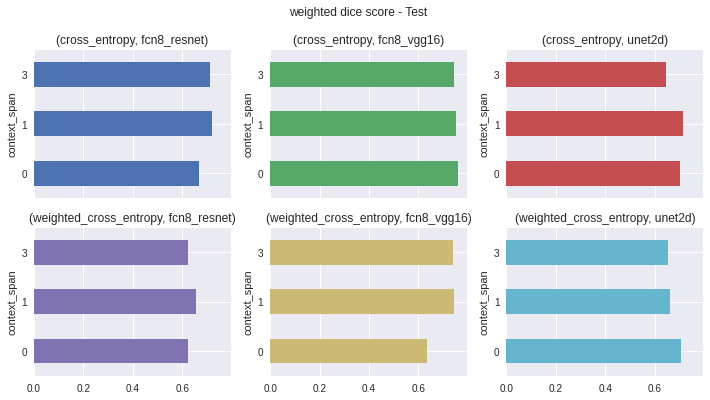

In [196]:
test_wd = res_select.pivot(index = 'context_span', columns = ['loss', 'model_base'], values = 'test_weighted_dice')
test_d = res_select.pivot(index = 'context_span', columns = ['loss', 'model_base'], values = 'test_dice')

test_wd = test_wd.reindex(sorted(test_wd.columns), axis=1)

test_wd.applymap(lambda x : round(x, 2)).to_html('test_wd.html')
test_wd.plot.barh(subplots = True, layout = (2, 3), legend = False, figsize = (12, 6), sharex = True)
plt.suptitle('weighted dice score - Test')
plt.savefig('full_test_wd.png')

pd.concat([test_wd, test_d], axis=0).applymap(lambda x : round(x, 2))

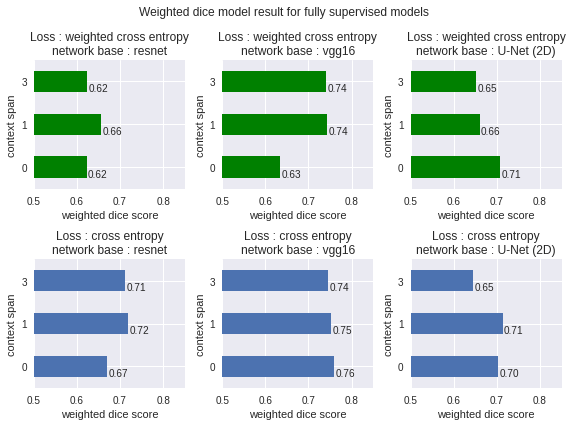

In [197]:
plt.figure(figsize=(8,6))

for i, n in enumerate(zip(['fcn8_resnet', 'fcn8_vgg16', 'unet2d'], ['resnet', 'vgg16', 'U-Net (2D)'])):
    netw, netw_name = n
    ax = plt.subplot(2,3,i+1)
    s = test_wd.loc[:, ('weighted_cross_entropy', netw)]
    bars = s.plot.barh(ax = plt.gca(), legend=False, color = 'g')
    for p in bars.patches:
        ax.annotate(f'{p.get_width():0.2f}', ( p.get_width() * 1.005, p.get_y() + 0.03))
    plt.xlabel('weighted dice score')
    plt.ylabel('context span')
    plt.xlim(0.5,0.85)
    plt.title(f'Loss : weighted cross entropy\nnetwork base : {netw_name}')

for i, n in enumerate(zip(['fcn8_resnet', 'fcn8_vgg16', 'unet2d'], ['resnet', 'vgg16', 'U-Net (2D)'])):
    netw, netw_name = n
    ax = plt.subplot(2,3,i+4)
    s = test_wd.loc[:, ('cross_entropy', netw)]
    bars = s.plot.barh(ax = plt.gca(), legend=False)
    for p in bars.patches:
        ax.annotate(f'{p.get_width():0.2f}', ( p.get_width() * 1.005, p.get_y() + 0.03))
    plt.xlabel('weighted dice score')
    plt.ylabel('context span')
    plt.xlim(0.5,0.85)
    plt.title(f'Loss : cross entropy\nnetwork base : {netw_name}')

plt.suptitle('Weighted dice model result for fully supervised models')
plt.tight_layout()

plt.savefig('FullySupervised.png')


In [198]:
foldername = results_dict[2].query("context_span == 1 & loss == 'weighted_cross_entropy' & model_base == 'fcn8_vgg16'").foldername.iloc[0]


365ae50c5f1f0a7320a2db9e99cd5cc8


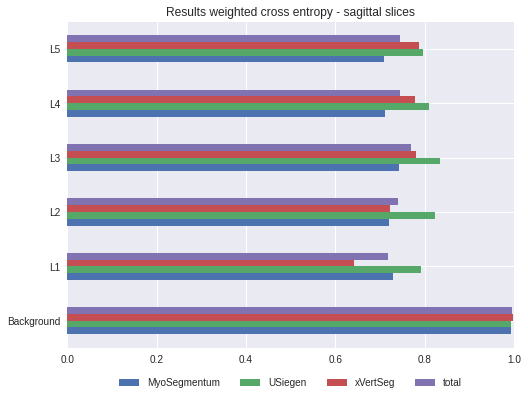

In [199]:
foldername = results_dict[2].query("context_span == 1 & loss == 'weighted_cross_entropy' & model_base == 'fcn8_vgg16'").foldername.iloc[0]
print(foldername)
Myo_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_MyoSegmenTUM_df.csv'), index_col=0)
USieg_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_USiegen_df.csv'), index_col=0)
xVert_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_xVertSeg_df.csv'), index_col=0)
all_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_df.csv'), index_col=0)

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['dice']

temp.plot(kind = 'barh', xlim = (0, 1), figsize=(8, 6))
plt.title('Results weighted cross entropy - sagittal slices')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=4)
plt.savefig('full_perClass_perSource_weighted.png')

dfaeaf1bd9747b2b0d135fd495f699ec


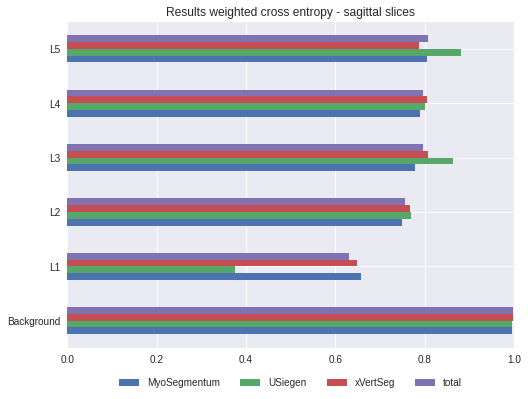

In [200]:
foldername = results_dict[2].query("context_span == 1 & loss == 'cross_entropy' & model_base == 'fcn8_vgg16'").foldername.iloc[0]
print(foldername)
Myo_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_MyoSegmenTUM_df.csv'), index_col=0)
USieg_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_USiegen_df.csv'), index_col=0)
xVert_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_xVertSeg_df.csv'), index_col=0)
all_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_df.csv'), index_col=0)

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['dice']

temp.plot(kind = 'barh', xlim = (0, 1), figsize=(8, 6))
plt.title('Results weighted cross entropy - sagittal slices')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=4)
plt.savefig('full_perClass_perSource_notweighted.png')